In [1]:
#import numpy,pandas,matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import loan csv
loans = pd.read_csv("d:\loan\loan.csv",low_memory=False)

In [4]:
#print column name
for column in loans.columns:
    print(column)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

In [5]:
#drop all the columns with all na values
loans_non_na=loans.dropna(axis=1,how='all')
print(loans.shape)
print(loans_non_na.shape)

(39717, 111)
(39717, 57)


In [6]:
#bin to loan amount to understand distribution of loan
#define new column loan_amnt_range
loan_amnt_bins = [0, 5000,  10000,  15000,  20000,  25000,  30000,  35000]
loans_non_na["loan_amnt_range"]=pd.cut(loans_non_na['loan_amnt'],bins=loan_amnt_bins)
loans_non_na['loan_amnt_range'].head()
loans_non_na.to_csv('loans_non_na.csv', index=False)

C:\Users\owner\AppData\Local\Temp\ipykernel_19264\4281157640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_non_na["loan_amnt_range"]=pd.cut(loans_non_na['loan_amnt'],bins=loan_amnt_bins)


In [7]:
zero_columns = loans_non_na.columns[(loans_non_na.eq(0) | loans_non_na.isnull() | (loans_non_na=='')).all()]
loans_clean = loans_non_na.drop(zero_columns,axis=1)
#loans_clean.to_csv('loans_clean.csv', index=False)
print(loans_clean.shape)

loans_clean_1 = loans_clean[loans_clean['loan_amnt'] > loans_clean['funded_amnt']]
print(loans_clean_1.shape)

(39717, 53)
(1849, 53)


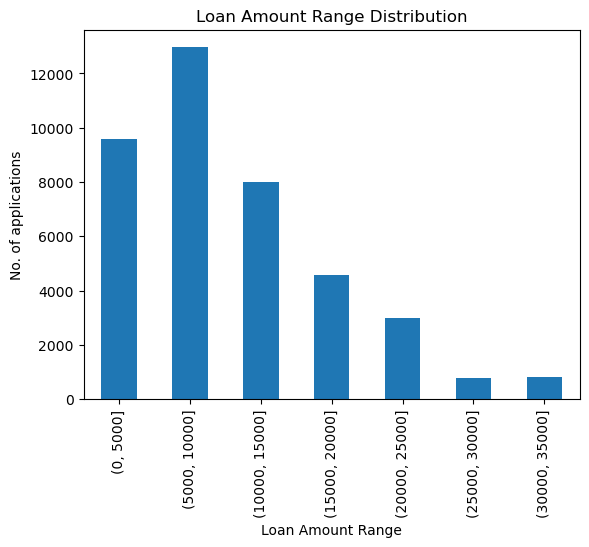

In [8]:
# Calculate the loan amount range counts and sort by loan amount range
loan_range_counts = loans_non_na['loan_amnt_range'].value_counts().sort_index()

# Plot the loan amount range counts as a bar graph
loan_range_counts.plot(kind='bar')

# Set labels and title for the plot
plt.xlabel('Loan Amount Range')
plt.ylabel('No. of applications')
plt.title('Loan Amount Range Distribution')

# Display the plot
plt.show()

In [9]:

loan_dist = loans['loan_amnt'].value_counts().reset_index()

In [10]:
print(loan_dist)

     index  loan_amnt
0    10000       2833
1    12000       2334
2     5000       2051
3     6000       1908
4    15000       1895
..     ...        ...
880  22875          1
881   8175          1
882  19475          1
883  21225          1
884  22550          1

[885 rows x 2 columns]


In [11]:
print(type(loan_dist))

<class 'pandas.core.frame.DataFrame'>


In [12]:
print(loans["loan_amnt"].min(),loans["loan_amnt"].max(),loans["loan_amnt"].sum() )

500 35000 445602650


In [13]:
print(loans["int_rate"].min(),loans["int_rate"].max() )

10.00% 9.99%


In [14]:
loans['int_rate_n'] = loans['int_rate'].str.replace('%','').astype(float)

In [15]:
print(loans["int_rate_n"].min(),loans["int_rate_n"].max() )

5.42 24.59


In [16]:
loans["loan_amnt_range"]=pd.cut(loans['loan_amnt'],bins=loan_amnt_bins)

In [17]:
 loan_range_counts = loans['loan_amnt_range'].value_counts().sort_index()

In [18]:
int_rate_bins = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25]

In [19]:
loans["int_rate_range"]=pd.cut(loans['int_rate_n'],bins=int_rate_bins)

In [20]:
int_rate_counts = loans['int_rate_range'].value_counts().sort_index()

In [21]:
print(int_rate_counts)

(0.0, 2.5]         0
(2.5, 5.0]         0
(5.0, 7.5]      5377
(7.5, 10.0]     7016
(10.0, 12.5]    9650
(12.5, 15.0]    9144
(15.0, 17.5]    5331
(17.5, 20.0]    2327
(20.0, 22.5]     794
(22.5, 25.0]      78
Name: int_rate_range, dtype: int64


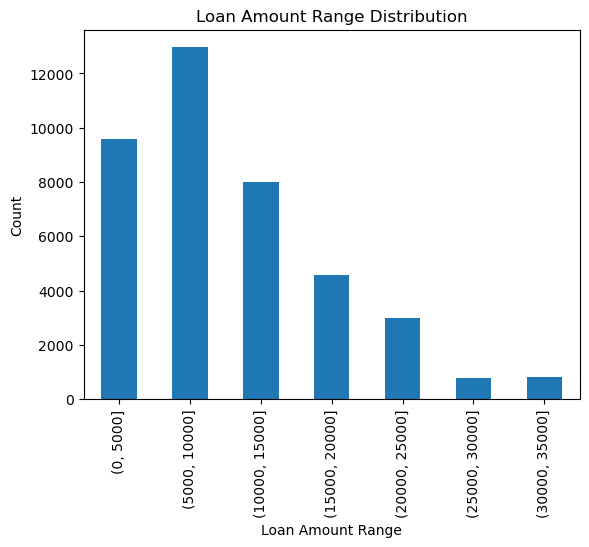

In [22]:
# Calculate the loan amount range counts and sort by loan amount range
loan_range_counts = loans['loan_amnt_range'].value_counts().sort_index()

# Plot the loan amount range counts as a bar graph
loan_range_counts.plot(kind='bar')

# Set labels and title for the plot
plt.xlabel('Loan Amount Range')
plt.ylabel('Count')
plt.title('Loan Amount Range Distribution')

# Display the plot
plt.show()

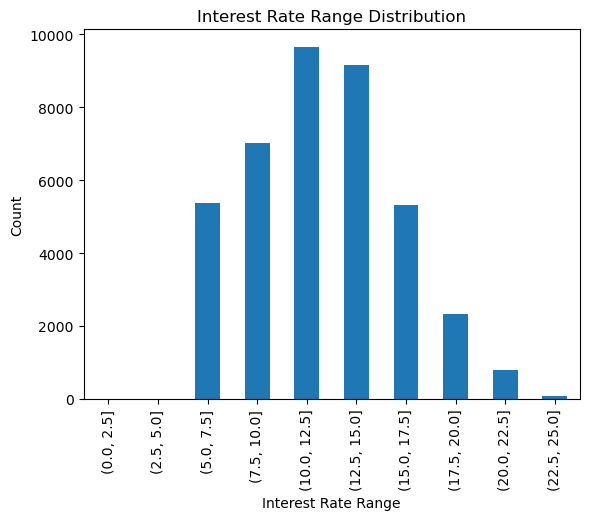

In [23]:
# Calculate the Interest rate range counts and sort by Interest rate range.
int_rate_range_counts = loans['int_rate_range'].value_counts().sort_index()

# Plot the Interest Rate range counts as a bar graph
int_rate_range_counts.plot(kind='bar')

# Set labels and title for the plot
plt.xlabel('Interest Rate Range')
plt.ylabel('Count')
plt.title('Interest Rate Range Distribution')

# Display the plot
plt.show()

In [57]:
charged_off_loans = loans_clean[loans_clean['loan_status'] == 'Charged Off']

In [59]:
loans_by_grade = charged_off_loans.groupby('grade').size()
loans_by_sub_grade = charged_off_loans.groupby('sub_grade').size()


loans_by_grade

grade
A     602
B    1425
C    1347
D    1118
E     715
F     319
G     101
dtype: int64

In [50]:
total_charged_off_loans_grade = loans_clean.groupby('grade').size()
total_charged_off_loans_sub_grade = loans_clean.groupby('sub_grade').size()

In [51]:
total_charged_off_loans.head()

grade
A    10085
B    12020
C     8098
D     5307
E     2842
dtype: int64

In [52]:
percentage_by_grade = (loans_by_grade / total_charged_off_loans_grade) * 100
percentage_by_sub_grade = (loans_by_sub_grade / total_charged_off_loans_sub_grade) * 100

In [46]:
percentage_by_grade.head()

grade
A     5.969261
B    11.855241
C    16.633737
D    21.066516
E    25.158339
dtype: float64

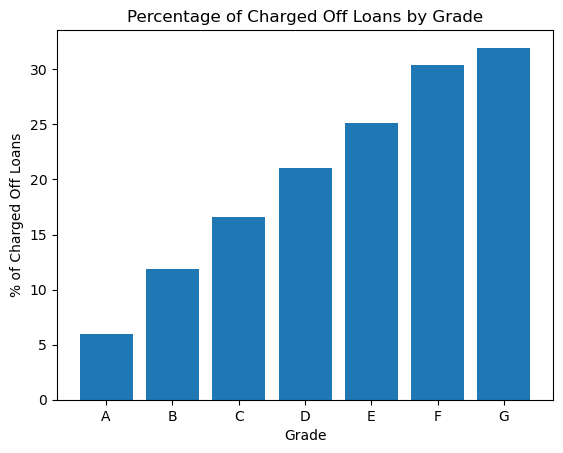

In [53]:
plt.bar(percentage_by_grade.index, percentage_by_grade.values)
plt.xlabel('Grade')
plt.ylabel('% of Charged Off Loans')
plt.title('Percentage of Charged Off Loans by Grade')
plt.show()

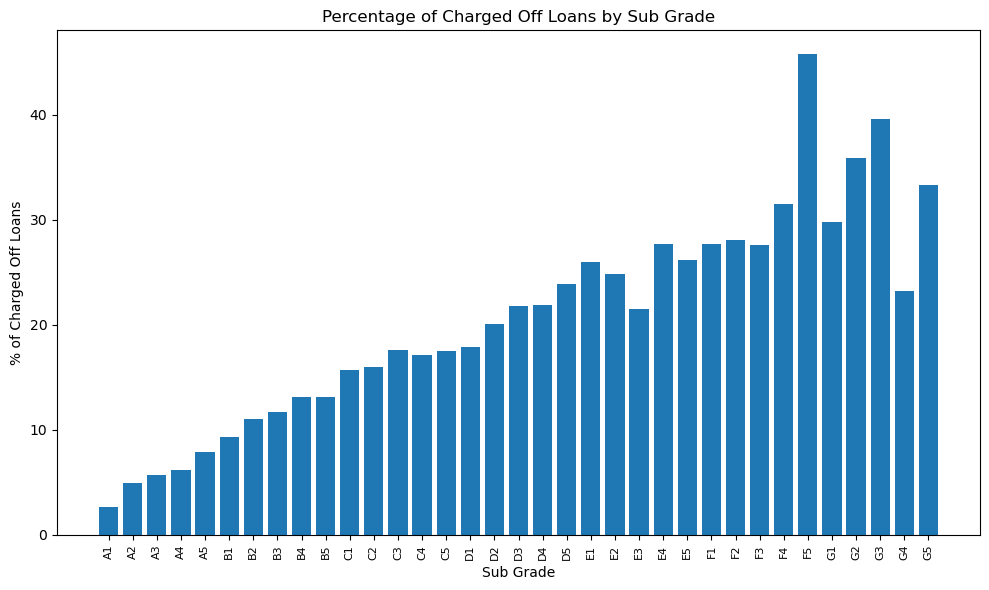

In [56]:
x_ticks = range(len(percentage_by_sub_grade.index))
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
ax.bar(x_ticks, percentage_by_sub_grade.values)
ax.set_xlabel('Sub Grade')
ax.set_ylabel('% of Charged Off Loans')
ax.set_title('Percentage of Charged Off Loans by Sub Grade')
ax.set_xticks(x_ticks)
ax.set_xticklabels(percentage_by_sub_grade.index, rotation='vertical', fontsize=8)  # Set smaller font size and rotate the labels
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()

In [62]:
loans_by_home_ownership = charged_off_loans.groupby('home_ownership').size()
total_charged_off_loans_home_ownership = loans_clean.groupby('home_ownership').size()

In [63]:
print(total_charged_off_loans_home_ownership)
print(loans_by_home_ownership)

home_ownership
MORTGAGE    17659
NONE            3
OTHER          98
OWN          3058
RENT        18899
dtype: int64
home_ownership
MORTGAGE    2327
OTHER         18
OWN          443
RENT        2839
dtype: int64


In [64]:
percentage_by_home_ownership = (loans_by_home_ownership / total_charged_off_loans_home_ownership) * 100

In [65]:
print(percentage_by_home_ownership)

home_ownership
MORTGAGE    13.177417
NONE              NaN
OTHER       18.367347
OWN         14.486593
RENT        15.021959
dtype: float64


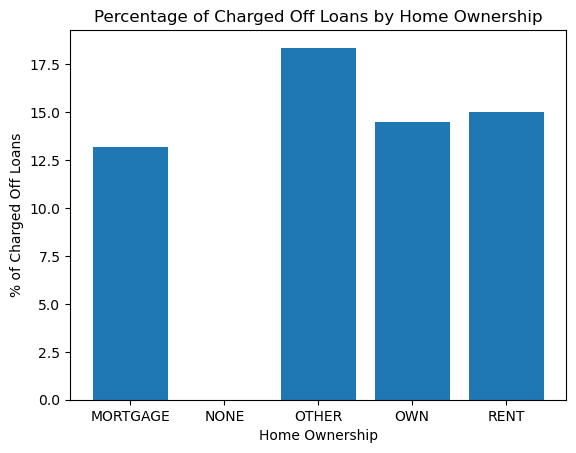

In [66]:
plt.bar(percentage_by_home_ownership.index, percentage_by_home_ownership.values)
plt.xlabel('Home Ownership')
plt.ylabel('% of Charged Off Loans')
plt.title('Percentage of Charged Off Loans by Home Ownership')
plt.show()

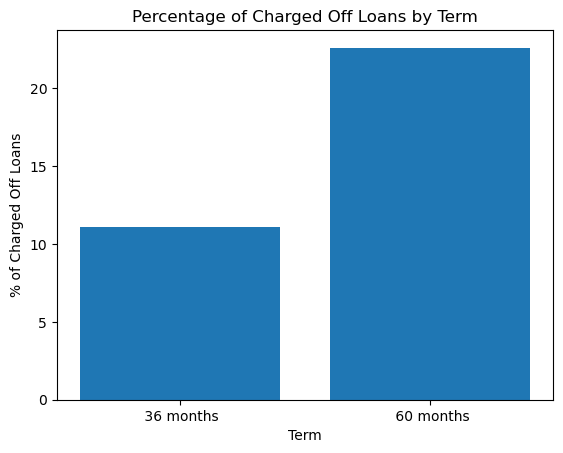

In [67]:

total_charged_off_loans_by_term = charged_off_loans.groupby('term').size()

total_loans_term = loans_clean.groupby('term').size()
percentage_by_term = (total_charged_off_loans_by_term / total_loans_term) * 100

plt.bar(percentage_by_term.index, percentage_by_term.values)
plt.xlabel('Term')
plt.ylabel('% of Charged Off Loans')
plt.title('Percentage of Charged Off Loans by Term')
plt.show()

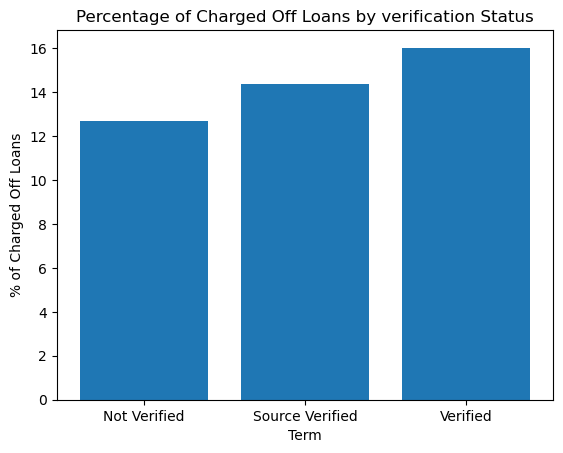

In [68]:
total_charged_off_loans_by_verification_status = charged_off_loans.groupby('verification_status').size()

total_loans_verification_status = loans_clean.groupby('verification_status').size()
percentage_by_verification_status = (total_charged_off_loans_by_verification_status / total_loans_verification_status) * 100

plt.bar(percentage_by_verification_status.index, percentage_by_verification_status.values)
plt.xlabel('Term')
plt.ylabel('% of Charged Off Loans')
plt.title('Percentage of Charged Off Loans by verification Status')
plt.show()

TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'

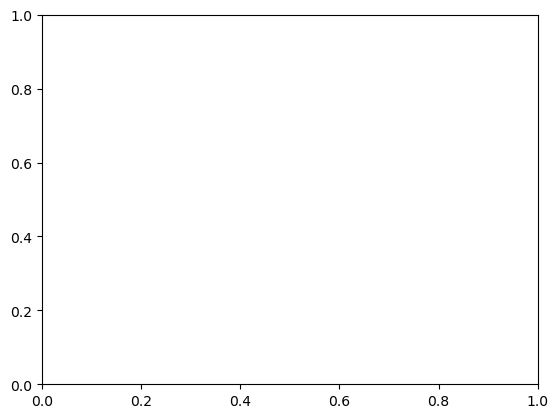

In [69]:
total_charged_off_loans_by_loan_amnt_range = charged_off_loans.groupby('loan_amnt_range').size()

total_loans_loan_amnt_range = loans_clean.groupby('loan_amnt_range').size()
percentage_by_loan_amnt_range = (total_charged_off_loans_by_loan_amnt_range / total_loans_loan_amnt_range) * 100

plt.bar(percentage_by_loan_amnt_range.index, percentage_by_loan_amnt_range.values)
plt.xlabel('Loan Amount')
plt.ylabel('% of Charged Off Loans')
plt.title('Percentage of Charged Off Loans by Loan Amount')
plt.show()

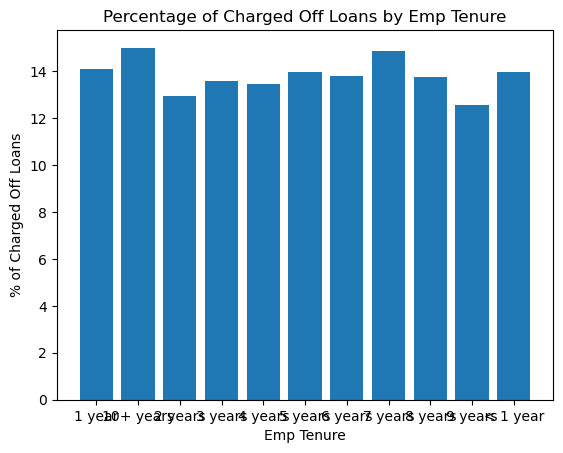

In [71]:
total_charged_off_loans_by_emp_length = charged_off_loans.groupby('emp_length').size()

total_loans_emp_length = loans_clean.groupby('emp_length').size()
percentage_by_emp_length = (total_charged_off_loans_by_emp_length / total_loans_emp_length) * 100

plt.bar(percentage_by_emp_length.index, percentage_by_emp_length.values)
plt.xlabel('Emp Tenure')
plt.ylabel('% of Charged Off Loans')
plt.title('Percentage of Charged Off Loans by Emp Tenure')
plt.show()

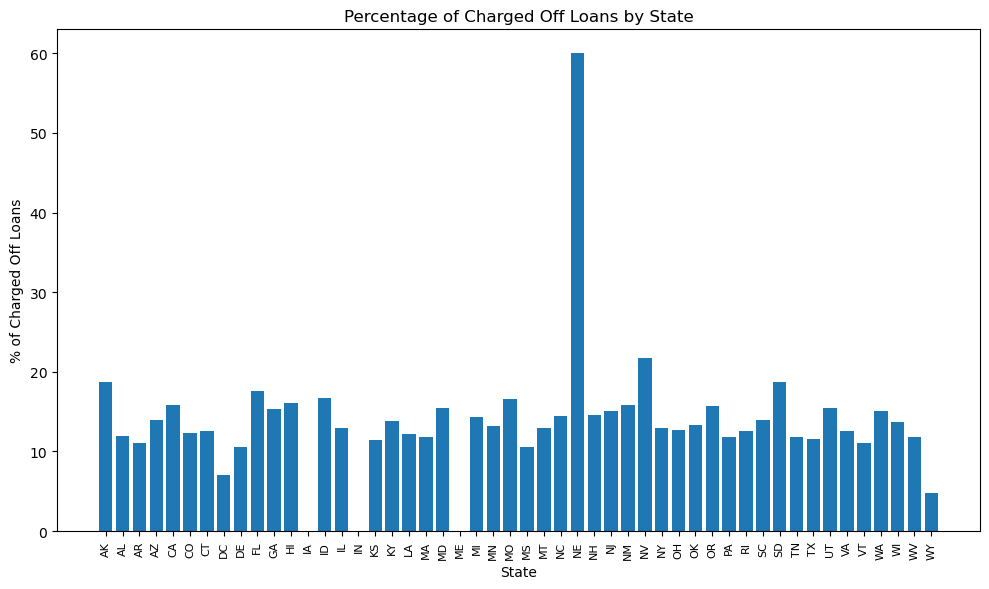

In [72]:
total_charged_off_loans_by_addr_state = charged_off_loans.groupby('addr_state').size()

total_loans_addr_state = loans_clean.groupby('addr_state').size()
percentage_by_addr_state = (total_charged_off_loans_by_addr_state / total_loans_addr_state) * 100

x_ticks = range(len(percentage_by_addr_state.index))
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
ax.bar(x_ticks, percentage_by_addr_state.values)
ax.set_xlabel('State')
ax.set_ylabel('% of Charged Off Loans')
ax.set_title('Percentage of Charged Off Loans by State')
ax.set_xticks(x_ticks)
ax.set_xticklabels(percentage_by_addr_state.index, rotation='vertical', fontsize=8)  # Set smaller font size and rotate the labels
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()


In [75]:
# Step 1: Filter the dataframe
charged_off_loans = loans_clean[loans_clean['loan_status'] == 'Charged Off']
print(charged_off_loans.shape)


(5627, 53)


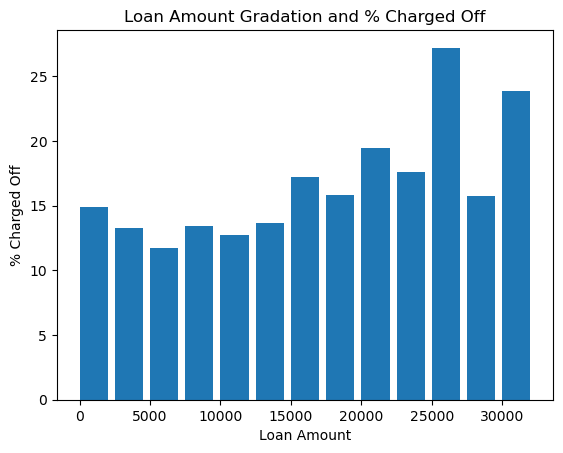

In [106]:
# Step 1: Filter the dataframe
charged_off_loans = loans_clean[loans_clean['loan_status'] == 'Charged Off']

# Step 2: Group loan amounts into bins and calculate count
loan_bins = np.arange(0, 35000, 2500)  # Define the bin ranges
charged_off_loan_groups = charged_off_loans.groupby(pd.cut(charged_off_loans['loan_amnt'], loan_bins))
loan_groups = loans_clean.groupby(pd.cut(loans_clean['loan_amnt'], loan_bins))
charged_off_by_bin = charged_off_loan_groups.size()
loan_groups_by_bin= loan_groups.size()
# Step 3: Calculate the total number of Charged Off loans
#total_charged_off_loans = loan_groups_by_bin.shape[0]

# Step 4: Calculate the percentage of Charged Off loans for each loan amount bin
percentage_charged_off = (charged_off_by_bin / loan_groups_by_bin) * 100
width = 0.8 * (loan_bins[1] - loan_bins[0]) 
# Step 5: Create the matplotlib bar plot
plt.bar(loan_bins[:-1], percentage_charged_off.values, width=width,align='edge')
plt.xlabel('Loan Amount')
plt.ylabel('% Charged Off')
plt.title('Loan Amount Gradation and % Charged Off')
plt.show()

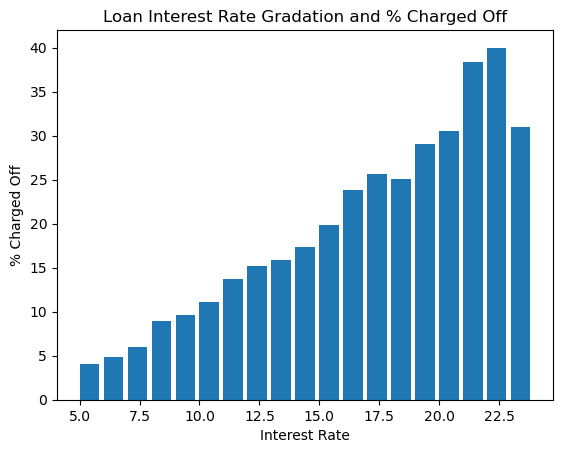

In [109]:
loans_clean['int_rate_float'] = loans_clean['int_rate'].str.rstrip('%').astype(float)

# Step 1: Filter the dataframe
charged_off_loans = loans_clean[loans_clean['loan_status'] == 'Charged Off']

# Step 2: Group loan amounts into bins and calculate count
loan_bins = np.arange(0, 25, 1)  # Define the bin ranges
charged_off_loan_groups = charged_off_loans.groupby(pd.cut(charged_off_loans['int_rate_float'], loan_bins))
loan_groups = loans_clean.groupby(pd.cut(loans_clean['int_rate_float'], loan_bins))
charged_off_by_bin = charged_off_loan_groups.size()
loan_groups_by_bin= loan_groups.size()
# Step 3: Calculate the total number of Charged Off loans
#total_charged_off_loans = loan_groups_by_bin.shape[0]

# Step 4: Calculate the percentage of Charged Off loans for each loan amount bin
percentage_charged_off = (charged_off_by_bin / loan_groups_by_bin) * 100
width = 0.8 * (loan_bins[1] - loan_bins[0]) 
# Step 5: Create the matplotlib bar plot
plt.bar(loan_bins[:-1], percentage_charged_off.values, width=width,align='edge')
plt.xlabel('Interest Rate')
plt.ylabel('% Charged Off')
plt.title('Loan Interest Rate Gradation and % Charged Off')
plt.show()

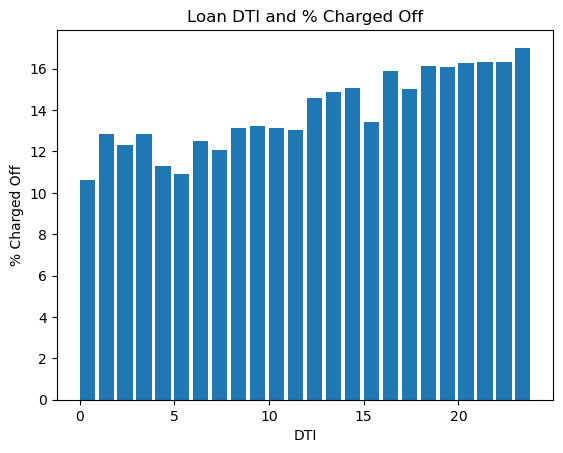

In [111]:


# Step 1: Filter the dataframe
charged_off_loans = loans_clean[loans_clean['loan_status'] == 'Charged Off']

# Step 2: Group loan amounts into bins and calculate count
loan_bins = np.arange(0, 25, 1)  # Define the bin ranges
charged_off_loan_groups = charged_off_loans.groupby(pd.cut(charged_off_loans['dti'], loan_bins))
loan_groups = loans_clean.groupby(pd.cut(loans_clean['dti'], loan_bins))
charged_off_by_bin = charged_off_loan_groups.size()
loan_groups_by_bin= loan_groups.size()
# Step 3: Calculate the total number of Charged Off loans
#total_charged_off_loans = loan_groups_by_bin.shape[0]

# Step 4: Calculate the percentage of Charged Off loans for each loan amount bin
percentage_charged_off = (charged_off_by_bin / loan_groups_by_bin) * 100
width = 0.8 * (loan_bins[1] - loan_bins[0]) 
# Step 5: Create the matplotlib bar plot
plt.bar(loan_bins[:-1], percentage_charged_off.values, width=width,align='edge')
plt.xlabel('DTI')
plt.ylabel('% Charged Off')
plt.title('Loan DTI and % Charged Off')
plt.show()